Final Project: Sabermetrics 

Using MLB team data from 1938-2012 (updated to 1999-2012 after data cleaning), I wanted to answer a few questions:
    
    1. How is the pythagoraean expectation calculated? 
    
    2. How can the pythagorean expectation be used to predict MLB Team winning percentages?
    
    3. How can the pythagorean expectation be used to determine if teams over or under performed, the number of games a team is expected to win, and determine by how much a team either did or did not meet the number of games expected?
    
    4. What variables are associated with a teams number of wins?
    
    5. What variables are associated with a teams runs scored?
    
    6. What variables are associated with a teams runs allowed?
    
    7. How can the determined correlated variables be used to develop predictive models to determine team wins, runs scored, runs allowed, and winning percentage?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import *
from scipy.stats.stats import pearsonr 


In [2]:
#reading the baseball.csv into a variable called mlb
mlb = pd.read_csv('baseballstats.csv')

In [3]:
#printing the csv file by calling the variable mlb
mlb


,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
5,CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NaN,NaN,162,0.319,0.405
6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
7,CLE,AL,2012,667,845,68,0.324,0.381,0.251,0,NaN,NaN,162,0.336,0.430
8,COL,NL,2012,758,890,64,0.330,0.436,0.274,0,NaN,NaN,162,0.357,0.470
9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402


In [4]:
#printing the info of the csv to see the contents
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [5]:
#checking to see if there are any missing values in the df 
#I see there are missing values in the RankSeason, RankPlayoffs, OOBP, OSLG columns
#Options - remove missing values or inputation using mean, median, or mode
mlb.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [6]:
#choosing to drop the missing values since using imputation will drop the level of variability of the data
#setting the variable mlb2 to the function to drop all the NaN values
mlb2 = mlb.dropna()

In [7]:
#resetting index to avoid issues later with NaN values in predictive models
m = mlb2.reset_index()

In [8]:
#printing new df 
m

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
1,2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
2,6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,1,2.0,4.0,162,0.305,0.390
3,9,DET,AL,2012,726,670,88,0.335,0.422,0.268,1,6.0,2.0,162,0.314,0.402
4,18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,1,3.0,3.0,162,0.311,0.419
5,19,OAK,AL,2012,713,614,94,0.310,0.404,0.238,1,4.0,4.0,162,0.306,0.378
6,24,SFG,NL,2012,718,649,94,0.327,0.397,0.269,1,4.0,1.0,162,0.313,0.393
7,25,STL,NL,2012,765,648,88,0.338,0.421,0.271,1,6.0,3.0,162,0.313,0.387
8,27,TEX,AL,2012,808,707,93,0.334,0.446,0.273,1,5.0,5.0,162,0.309,0.408
9,29,WSN,NL,2012,731,594,98,0.322,0.428,0.261,1,1.0,4.0,162,0.303,0.373


In [9]:
#checking to see if dropping the values truly worked
m.isnull().sum()

index           0
Team            0
League          0
Year            0
RS              0
RA              0
W               0
OBP             0
SLG             0
BA              0
Playoffs        0
RankSeason      0
RankPlayoffs    0
G               0
OOBP            0
OSLG            0
dtype: int64

In [10]:
m.drop(columns=['Playoffs', 'RankSeason', 'RankPlayoffs'])

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG
0,1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,162,0.306,0.378
1,2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,162,0.315,0.403
2,6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,162,0.305,0.390
3,9,DET,AL,2012,726,670,88,0.335,0.422,0.268,162,0.314,0.402
4,18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,162,0.311,0.419
5,19,OAK,AL,2012,713,614,94,0.310,0.404,0.238,162,0.306,0.378
6,24,SFG,NL,2012,718,649,94,0.327,0.397,0.269,162,0.313,0.393
7,25,STL,NL,2012,765,648,88,0.338,0.421,0.271,162,0.313,0.387
8,27,TEX,AL,2012,808,707,93,0.334,0.446,0.273,162,0.309,0.408
9,29,WSN,NL,2012,731,594,98,0.322,0.428,0.261,162,0.303,0.373


In [11]:
#calculating the runs difference and adding it as a new columns to the mlb2 df
m.loc[:,'Runs Difference'] = (m['RA'][::] - m['RS'][::])

In [12]:
# assigning the variable runs_scored to the runs scored column 
runs_scored = m['RS'][::]

# assigning the variable runs_allowed to the runs allowed 
runs_allowed = m['RA'][::]

# defining the variable pythagorean_expectation to compute the equation for pythagorean expectation for NYY (1913-2016)
pythagorean_expectation = (runs_scored**1.83)/((runs_scored**1.83)+ (runs_allowed**1.83)) 


In [13]:
#calculating the pythagorian expectation and adding it to the df as a new column
m.loc[:,'Pythagorean Expectation'] = pythagorean_expectation

In [14]:
#calculating the winning percentage and adding it to the df as a new column
m.loc[:,'Winning Percentage'] = (m['W'][::]/m['G'][::])


In [15]:
#calculating if teams over or under performed and adding it to the df as a new column
m.loc[:,'Over or UnderPerformance'] = (np.where(m['Winning Percentage'][::] <= m['Pythagorean Expectation'], 'Underperformed', 'Overperformed'))


In [16]:
#calculating the number of games expected to win and adding it to the df as a new column
m.loc[:,'Games Expected to Win'] = (m['G'][::] * m['Pythagorean Expectation'])


In [17]:
#calculating the number of games either needed to win or games team won over and adding it to the df as a new column

m.loc[:,'Games Won - Games Expected to Win'] = (m['W'][::] - m['Games Expected to Win'])


In [18]:
#printing new df
m

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,...,RankPlayoffs,G,OOBP,OSLG,Runs Difference,Pythagorean Expectation,Winning Percentage,Over or UnderPerformance,Games Expected to Win,Games Won - Games Expected to Win
0,1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,...,5.0,162,0.306,0.378,-100,0.570060,0.580247,Overperformed,92.349712,1.650288
1,2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,...,4.0,162,0.315,0.403,-7,0.504520,0.574074,Overperformed,81.732244,11.267756
2,6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,...,4.0,162,0.305,0.390,-81,0.558771,0.598765,Overperformed,90.520854,6.479146
3,9,DET,AL,2012,726,670,88,0.335,0.422,0.268,...,2.0,162,0.314,0.402,-56,0.536659,0.543210,Overperformed,86.938706,1.061294
4,18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,...,3.0,162,0.311,0.419,-136,0.583977,0.586420,Overperformed,94.604205,0.395795
5,19,OAK,AL,2012,713,614,94,0.310,0.404,0.238,...,4.0,162,0.306,0.378,-99,0.567967,0.580247,Overperformed,92.010612,1.989388
6,24,SFG,NL,2012,718,649,94,0.327,0.397,0.269,...,1.0,162,0.313,0.393,-69,0.546093,0.580247,Overperformed,88.467085,5.532915
7,25,STL,NL,2012,765,648,88,0.338,0.421,0.271,...,3.0,162,0.313,0.387,-117,0.575360,0.543210,Underperformed,93.208265,-5.208265
8,27,TEX,AL,2012,808,707,93,0.334,0.446,0.273,...,5.0,162,0.309,0.408,-101,0.560788,0.574074,Overperformed,90.847725,2.152275
9,29,WSN,NL,2012,731,594,98,0.322,0.428,0.261,...,4.0,162,0.303,0.373,-137,0.593822,0.604938,Overperformed,96.199139,1.800861


In [19]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 22 columns):
index                                114 non-null int64
Team                                 114 non-null object
League                               114 non-null object
Year                                 114 non-null int64
RS                                   114 non-null int64
RA                                   114 non-null int64
W                                    114 non-null int64
OBP                                  114 non-null float64
SLG                                  114 non-null float64
BA                                   114 non-null float64
Playoffs                             114 non-null int64
RankSeason                           114 non-null float64
RankPlayoffs                         114 non-null float64
G                                    114 non-null int64
OOBP                                 114 non-null float64
OSLG                                 114 

In [20]:
m.drop(columns=['Playoffs', 'RankSeason', 'RankPlayoffs'])

,index,Team,League,Year,RS,RA,W,OBP,SLG,BA,G,OOBP,OSLG,Runs Difference,Pythagorean Expectation,Winning Percentage,Over or UnderPerformance,Games Expected to Win,Games Won - Games Expected to Win
0,1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,162,0.306,0.378,-100,0.570060,0.580247,Overperformed,92.349712,1.650288
1,2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,162,0.315,0.403,-7,0.504520,0.574074,Overperformed,81.732244,11.267756
2,6,CIN,NL,2012,669,588,97,0.315,0.411,0.251,162,0.305,0.390,-81,0.558771,0.598765,Overperformed,90.520854,6.479146
3,9,DET,AL,2012,726,670,88,0.335,0.422,0.268,162,0.314,0.402,-56,0.536659,0.543210,Overperformed,86.938706,1.061294
4,18,NYY,AL,2012,804,668,95,0.337,0.453,0.265,162,0.311,0.419,-136,0.583977,0.586420,Overperformed,94.604205,0.395795
5,19,OAK,AL,2012,713,614,94,0.310,0.404,0.238,162,0.306,0.378,-99,0.567967,0.580247,Overperformed,92.010612,1.989388
6,24,SFG,NL,2012,718,649,94,0.327,0.397,0.269,162,0.313,0.393,-69,0.546093,0.580247,Overperformed,88.467085,5.532915
7,25,STL,NL,2012,765,648,88,0.338,0.421,0.271,162,0.313,0.387,-117,0.575360,0.543210,Underperformed,93.208265,-5.208265
8,27,TEX,AL,2012,808,707,93,0.334,0.446,0.273,162,0.309,0.408,-101,0.560788,0.574074,Overperformed,90.847725,2.152275
9,29,WSN,NL,2012,731,594,98,0.322,0.428,0.261,162,0.303,0.373,-137,0.593822,0.604938,Overperformed,96.199139,1.800861


In [21]:
tn = m['Team'][0]
wp = m['Winning Percentage'][0]
pe = m['Pythagorean Expectation'][0]
gw = m['G'][0]
gew = m['Games Expected to Win'][0]
p = m['Over or UnderPerformance'][0]
pe = {'Metric':['Team Name', 'Winning Percentage', 'Pythagorean Expectation', 'Games Won', 'Games Expected to Win', 'Over or UnderPerformance'], 'Values':[tn, wp, pe, gw, gew, p]}
pe_df = pd.DataFrame(pe)



In [22]:
pe_df

,Metric,Values
0,Team Name,ATL
1,Winning Percentage,0.580247
2,Pythagorean Expectation,0.57006
3,Games Won,162
4,Games Expected to Win,92.3497
5,Over or UnderPerformance,Overperformed


To determine the variables associated with runs scored, I decided to analyze the pearson coefficients of each variable. 

I found the function online to calculate for all variables at one! #hallelujah! 

See references at the end for more info. 

In [23]:
def standardize(data):
    return (data - data.mean()) / data.std(ddof=0)
def pearsons_r(x, y):
    return (standardize(x) * standardize(y)).mean()
# It doesn't make sense to calculate the correlation between these values and home runs
leave_out = ['index', 'Year', 'Team', 'League', 'Playoffs', 'RankSeason', 'RankPlayoffs', 'Pythagorean Expectation', 'Over or UnderPerformance', 'Games Expected to Win', 'Games Won - Games Expected to Win']
# Meaning of the column names in the data
dictionary = {'index': 'IDX', 'Team':'Team Name','Year':'Year', 'League':'League Name', 
              'RS':'Runs Scored', 'RA': 'Runs Allowed', 'W':'Games Won', 'OBP': 'On Base Percentage', 
              'SLG': 'Slugging Percentage', 'BA': 'Batting Average', 'Playoffs': 'Playoff Rank', 
              'RankSeason': 'Season Rank', 'RankPlayoffs': 'Playoffs Rank', 'G':'Games Played',
              'OOBP': 'Opponnets On Base Percentage', 'OSLG': 'Opponnets Slugging Percentage',
              'Runs Difference': 'RS - RA', 'Pythagorean Expectation':'Pythagorean Expectation', 
              'Winning Percentage':'Winning Avg', 'Over or UnderPerformance':'Over or Under ', 
              'Games Expected to Win':'Games Expected', 
              'Games Won - Games Expected to Win':'Difference'}

positive_correlation = []
negative_correlation = []
strong_positive_correlation = []
strong_negative_correlation = []
def correlations_for_hr(nyy_brs_df):
    columns = list(nyy_brs_df)
    for x in columns:
        if x not in leave_out:
            name_of_metric = dictionary[x]
            r = pearsons_r(m['RS'], m[x])
            
            # Calculating the strenth of the correlation
            correlation = ''
            if r > 0.7:
                correlation = '++'
                strong_positive_correlation.append(name_of_metric)
            elif r > 0.5:
                correlation = '+ '
                positive_correlation.append(name_of_metric)
            elif r > 0.3:
                correlation = '+-'
                positive_correlation.append(name_of_metric)
            elif r >= -0.3:
                correlation = 'O '
            elif r > -0.5:
                correlation = '-+'
            elif r > -0.7:
                correlation = '- '
                negative_correlation.append(name_of_metric)
            elif r > -1:
                correlation = '--'
                strong_negative_correlation.append(name_of_metric)
                
            print('{} Correlation between RS and {}:{}'.format(correlation, name_of_metric, "%.3f"%r))
            print('-----------------------------------------')
            
print('Correlations:')
print('-----------------------------------------------------')
print(correlations_for_hr(m))
print('Positive correlations: {}'.format(positive_correlation))
print('\n')
print('Strong Positive correlations: {}'.format(strong_positive_correlation))
print('\n')
print('Negative correlations: {}'.format(negative_correlation))
print('\n')
print('Strong Negative correlations: {}'.format(strong_negative_correlation))

Correlations:
-----------------------------------------------------
++ Correlation between RS and Runs Scored:1.000
-----------------------------------------
++ Correlation between RS and Runs Allowed:0.710
-----------------------------------------
+- Correlation between RS and Games Won:0.361
-----------------------------------------
++ Correlation between RS and On Base Percentage:0.889
-----------------------------------------
++ Correlation between RS and Slugging Percentage:0.880
-----------------------------------------
++ Correlation between RS and Batting Average:0.758
-----------------------------------------
O  Correlation between RS and Games Played:-0.012
-----------------------------------------
+  Correlation between RS and Opponnets On Base Percentage:0.561
-----------------------------------------
+  Correlation between RS and Opponnets Slugging Percentage:0.522
-----------------------------------------
-  Correlation between RS and RS - RA:-0.544
----------------------

The variables that are positively correlated: RA, OBP, BA, and SLG on RS

I plotted the relationship using a lmplot to see if relationship to see this relationship visually :)

OBP - On Base Percentage
BA - Batting Average
SLG - Slugging Percentage
RA - Runs Allowed


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(-2.450000000000003, 0.5, 'RS')

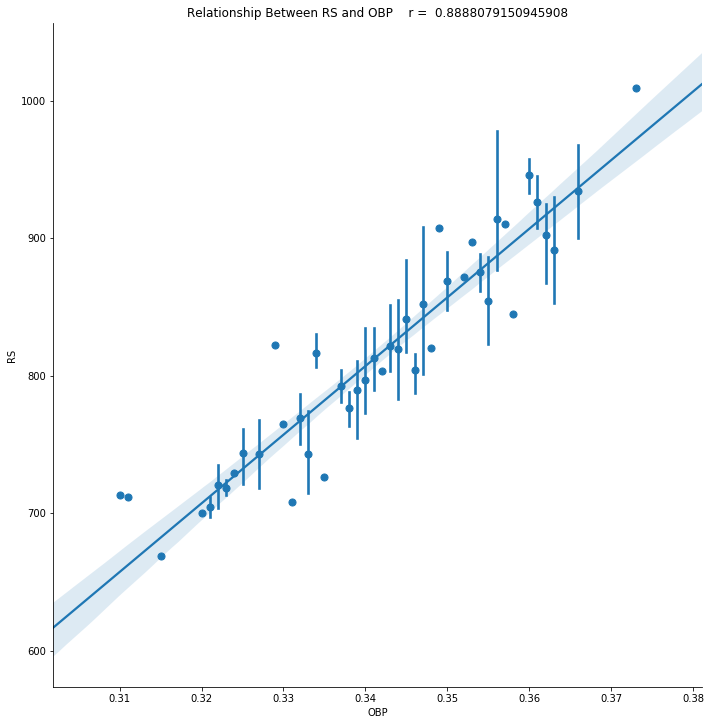

In [24]:
sns.lmplot(height=10, data=m[['RS', 'OBP']], x='OBP', y='RS', x_estimator=np.mean )
plt.title('Relationship Between RS and OBP' + '    r =  ' + str(pearsons_r(m['RS'], m['OBP'])))
# Set x-axis label
plt.xlabel('OBP')
# Set y-axis label
plt.ylabel('RS')

Scatter plot shows a linear relationship between OBP and RS. 

Text(-2.450000000000003, 0.5, 'RS')

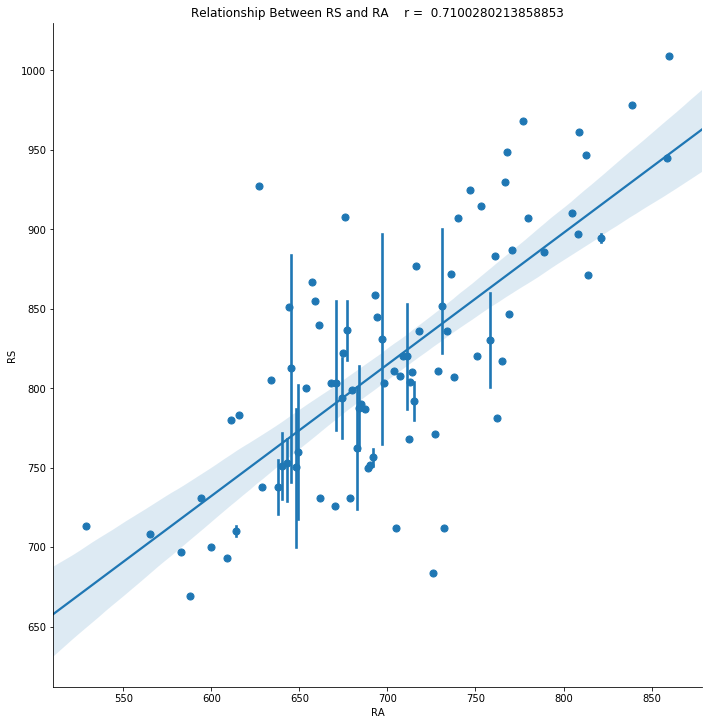

In [25]:
sns.lmplot(height=10, data=m[['RS', 'RA']], x='RA', y='RS', x_estimator=np.mean )
plt.title('Relationship Between RS and RA' + '    r =  ' + str(pearsons_r(m['RS'], m['RA'])))
# Set x-axis label
plt.xlabel('RA')
# Set y-axis label
plt.ylabel('RS')

Scatter plot shows a linear relationship between RA and RS.

Text(-2.450000000000003, 0.5, 'RS')

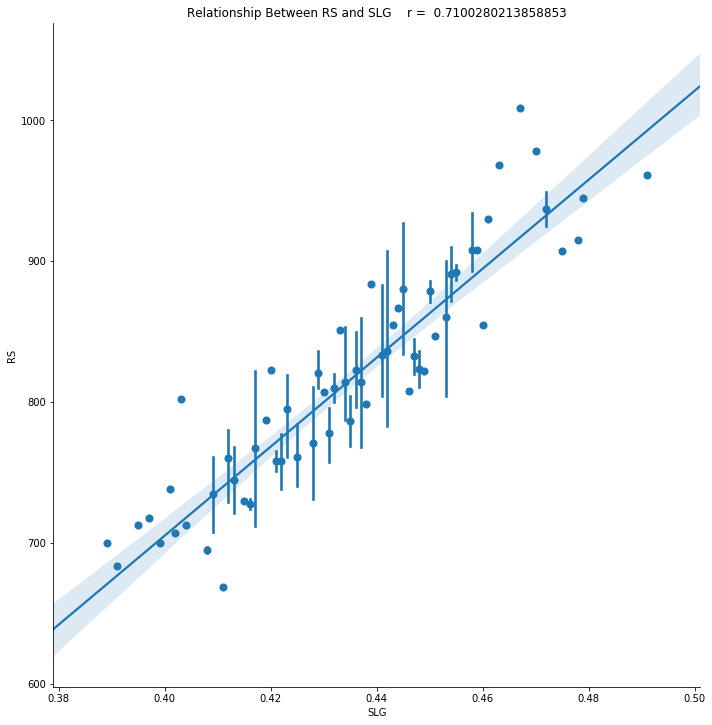

In [26]:
#plotting the relationship using a lmplot to see if relationship is linear or not - SLG & RS

sns.lmplot(height=10, data=mlb2[['RS', 'SLG']], x='SLG', y='RS', x_estimator=np.mean )
plt.title('Relationship Between RS and SLG' + '    r =  ' + str(pearsons_r(m['RS'], m['RA'])))
# Set x-axis label
plt.xlabel('SLG')
# Set y-axis label
plt.ylabel('RS')

Scatter plot shows a linear relationship between SLG and RS. 

Text(-2.450000000000003, 0.5, 'RS')

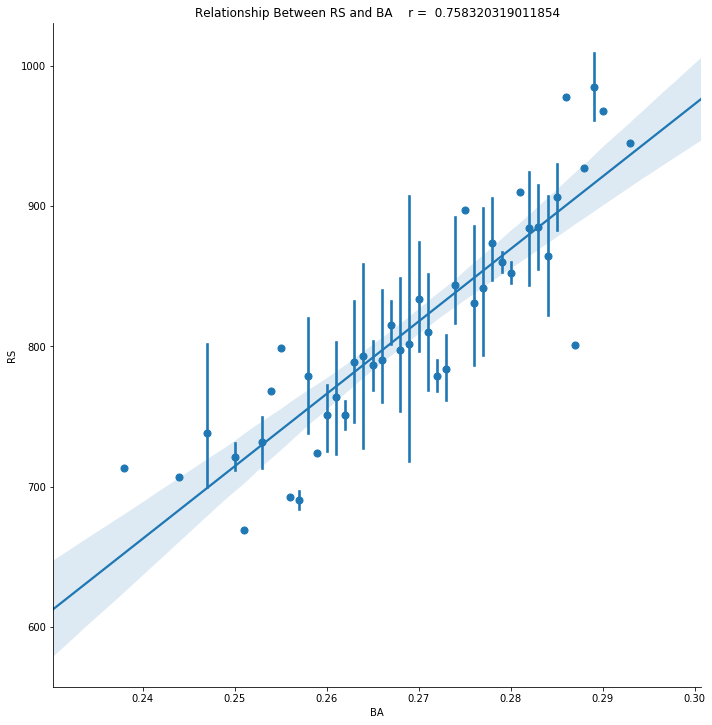

In [27]:
#plotting the relationship using a lmplot to see if relationship is linear or not - BA & RS

sns.lmplot(height=10, data=m[['RS', 'BA']], x='BA', y='RS', x_estimator=np.mean )
plt.title('Relationship Between RS and BA' +  '    r =  ' + str(pearsons_r(m['RS'], m['BA'])))
# Set x-axis label
plt.xlabel('BA')
# Set y-axis label
plt.ylabel('RS')

Scatter plot shows a linear relationship between BA and RS. 

In [28]:
# model to predict runs scored

# Extracting our variables from the dataframe.
x = m[['OBP','SLG', 'BA', 'RA']].values
y = m[['RS']].values

# Calling our model object.
RS_model = LinearRegression()

# Fitting the model.
RS_model.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

[-930.04824915]
[[ 2.86271781e+03  1.67269904e+03 -6.25923188e+01  8.16860376e-02]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


There is a negative coefficient associated with BA. Lets remove it and rerun the model.

In [29]:
# model to predict runs scored

# Extracting our variables from the dataframe.
x = m[['OBP','SLG', 'RA']].values
y = m[['RS']].values

# Calling our model object.
RS_model = LinearRegression()

# Fitting the model.
RS_model.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)



[-932.6900878]
[[2.83149999e+03 1.66491737e+03 8.14430157e-02]]


No negative coefficients, so lets continue with this model.

RS = -967.23 + 2960.34 X (OBP) + 1774.07 X (SLG) + 8.144 X (RA)

In [30]:

#predicting
predict_rs_osr = [[m['OBP'][0], m['SLG'][0], m['RA'][0]]]
prediction_rs_osr  = RS_model.predict(predict_rs_osr )
rs_osr  = prediction_rs_osr



In [31]:
# model to predict runs scored

# Extracting our variables from the dataframe.
x = m[['OBP']].values
y = m[['RS']].values

# Calling our model object.
RS_model2 = LinearRegression()

# Fitting the model.
RS_model2.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model2.intercept_)
print(RS_model2.coef_)



[-890.0936392]
[[4991.27586756]]


No negative coefficients so lets continue with the model. 
RS = -890.09 + 4991.26 X (OBP)

In [32]:

#predicting
predict_rs_obp = [[m['OBP'][0]]]
prediction_rs_obp = RS_model2.predict(predict_rs_obp)
rs_obp = prediction_rs_obp



In [33]:
# model to predict runs scored

# Extracting our variables from the dataframe.
x = m[['SLG']].values
y = m[['RS']].values

# Calling our model object.
RS_model3 = LinearRegression()

# Fitting the model.
RS_model3.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model3.intercept_)
print(RS_model3.coef_)



[-557.28708948]
[[3156.55332539]]


No negative coefficients so lets continue with the model. RS = -557.29 + 3156.55 X (SLG) 

In [34]:

#predicting
predict_rs_slg = [[m['SLG'][0]]]
prediction_rs_slg= RS_model3.predict(predict_rs_slg)
rs_slg = prediction_rs_slg



In [35]:
# model to predict runs scored

# Extracting our variables from the dataframe.
x = m[['RA']].values
y = m[['RS']].values

# Calling our model object.
RS_model4 = LinearRegression()

# Fitting the model.
RS_model4.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model4.intercept_)
print(RS_model4.coef_)



[235.26384588]
[[0.82815467]]


No negative coefficients so lets continue with the model. RS = 235.26 + 0.828 X (RA)

In [36]:
#predicting
predict_rs_ra = [[m['RA'][0]]]
prediction_rs_ra = RS_model4.predict(predict_rs_ra)
rs_ra = prediction_rs_ra 



In [37]:
actual_rs = m['RS'][0]

In [38]:
t = m['Team'][0]
rs_model_outputs = {'Model':['Team', 'OBP + SLG + RA Model', 'OBP Model', 'SLG Model', 'RA Model', 'Actual'], 'RS Prediction':[t, rs_osr, rs_obp, rs_slg, rs_ra, actual_rs]}
rs_model_outputs_df = pd.DataFrame(rs_model_outputs)



In [39]:
rs_model_outputs_df

,Model,RS Prediction
0,Team,ATL
1,OBP + SLG + RA Model,[[669.9085784461466]]
2,OBP Model,[[707.1146384196444]]
3,SLG Model,[[670.6121541006504]]
4,RA Model,[[732.1566483876456]]
5,Actual,700


In [40]:
#What variables are associated with RA?
def standardize(data):
    return (data - data.mean()) / data.std(ddof=0)
def pearsons_r(x, y):
    return (standardize(x) * standardize(y)).mean()
# It doesn't make sense to calculate the correlation between these values and home runs
leave_out = ['index', 'Year', 'Team', 'League', 'Playoffs', 'RankSeason', 'RankPlayoffs', 'Pythagorean Expectation', 'Over or UnderPerformance', 'Games Expected to Win', 'Games Won - Games Expected to Win']
# Meaning of the column names in the data
dictionary = {'index': 'IDX', 'Team':'Team Name','Year':'Year', 'League':'League Name', 
              'RS':'Runs Scored', 'RA': 'Runs Allowed', 'W':'Games Won', 'OBP': 'On Base Percentage', 
              'SLG': 'Slugging Percentage', 'BA': 'Batting Average', 'Playoffs': 'Playoff Rank', 
              'RankSeason': 'Season Rank', 'RankPlayoffs': 'Playoffs Rank', 'G':'Games Played',
              'OOBP': 'Opponnets On Base Percentage', 'OSLG': 'Opponnets Slugging Percentage',
              'Runs Difference': 'RS - RA', 'Pythagorean Expectation':'Pythagorean Expectation', 
              'Winning Percentage':'Winning Avg', 'Over or UnderPerformance':'Over or Under ', 
              'Games Expected to Win':'Games Expected', 
              'Games Won - Games Expected to Win':'Difference'}

positive_correlation = []
negative_correlation = []
strong_positive_correlation = []
strong_negative_correlation = []
def correlations_for_hr(nyy_brs_df):
    columns = list(nyy_brs_df)
    for x in columns:
        if x not in leave_out:
            name_of_metric = dictionary[x]
            r = pearsons_r(m['RA'], m[x])
            
            # Calculating the strenth of the correlation
            correlation = ''
            if r > 0.7:
                correlation = '++'
                strong_positive_correlation.append(name_of_metric)
            elif r > 0.5:
                correlation = '+ '
                positive_correlation.append(name_of_metric)
            elif r > 0.3:
                correlation = '+-'
                positive_correlation.append(name_of_metric)
            elif r >= -0.3:
                correlation = 'O '
            elif r > -0.5:
                correlation = '-+'
            elif r > -0.7:
                correlation = '- '
                negative_correlation.append(name_of_metric)
            elif r > -1:
                correlation = '--'
                strong_negative_correlation.append(name_of_metric)
                
            print('{} Correlation between RA and {}:{}'.format(correlation, name_of_metric, "%.3f"%r))
            print('-----------------------------------------')
            
print('Correlations:')
print('-----------------------------------------------------')
print(correlations_for_hr(m))
print('Positive correlations: {}'.format(positive_correlation))
print('\n')
print('Strong Positive correlations: {}'.format(strong_positive_correlation))
print('\n')
print('Negative correlations: {}'.format(negative_correlation))
print('\n')
print('Strong Negative correlations: {}'.format(strong_negative_correlation))

Correlations:
-----------------------------------------------------
++ Correlation between RA and Runs Scored:0.710
-----------------------------------------
++ Correlation between RA and Runs Allowed:1.000
-----------------------------------------
O  Correlation between RA and Games Won:-0.203
-----------------------------------------
+  Correlation between RA and On Base Percentage:0.647
-----------------------------------------
+  Correlation between RA and Slugging Percentage:0.676
-----------------------------------------
+  Correlation between RA and Batting Average:0.574
-----------------------------------------
O  Correlation between RA and Games Played:-0.002
-----------------------------------------
++ Correlation between RA and Opponnets On Base Percentage:0.823
-----------------------------------------
++ Correlation between RA and Opponnets Slugging Percentage:0.838
-----------------------------------------
O  Correlation between RA and RS - RA:0.205
----------------------

The variables that are positively correlated: RS, OOBP, and OSLG on RA

I plotted the relationship using a lmplot to see if relationship to see this relationship visually :)

RS - Runs Scored
OOBP - Opponnets On Base Percentagentage
OSLG - Opponnets On Slugging Percentagentage
RA - Runs Allowed


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(3.674999999999997, 0.5, 'RA')

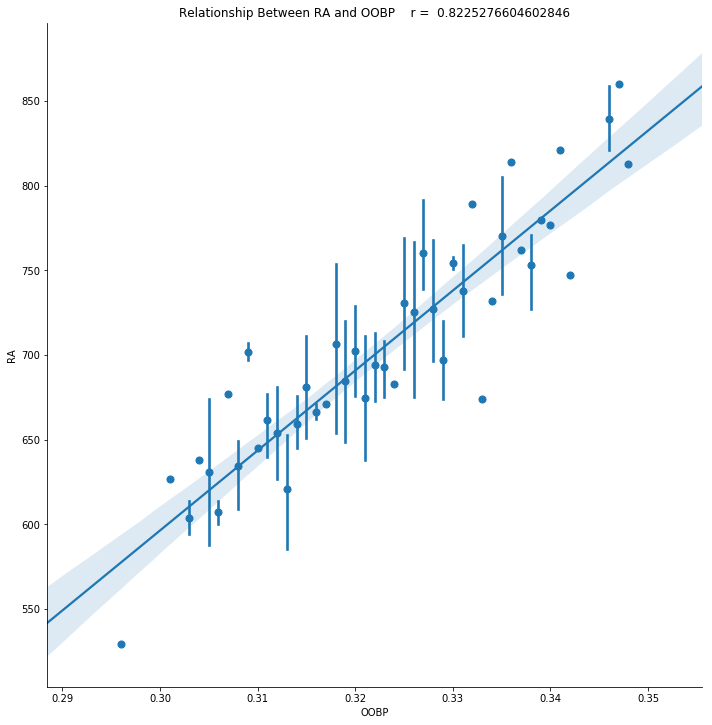

In [41]:
#plotting the relationship using a lmplot to see if relationship is linear or not - RA & OOBP


sns.lmplot(height=10, data=m[['RA', 'OOBP']], x='OOBP', y='RA', x_estimator=np.mean )
plt.title('Relationship Between RA and OOBP' +  '    r =  ' + str(pearsons_r(m['OOBP'], m['RA'])))
# Set x-axis label
plt.xlabel('OOBP')
# Set y-axis label
plt.ylabel('RA')

Text(3.674999999999997, 0.5, 'RA')

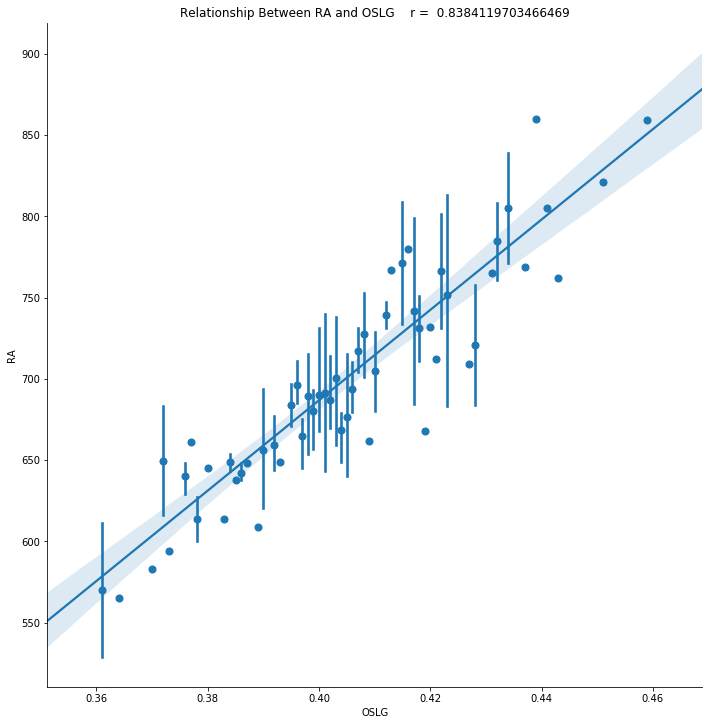

In [42]:
#plotting the relationship using a lmplot to see if relationship is linear or not - RA & OSLG
#RA - runs allowed
#OSLG - Opponnets Slugging Percentage

sns.lmplot(height=10, data=m[['RA', 'OSLG']], x='OSLG', y='RA', x_estimator=np.mean )
plt.title('Relationship Between RA and OSLG' +  '    r =  ' + str(pearsons_r(m['OSLG'], m['RA'])))
# Set x-axis label
plt.xlabel('OSLG')
# Set y-axis label
plt.ylabel('RA')

Text(3.674999999999997, 0.5, 'RA')

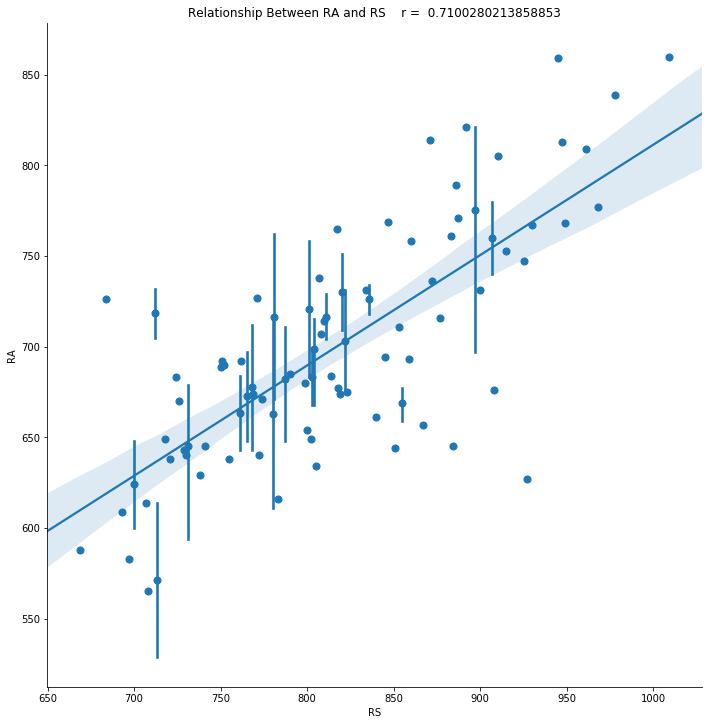

In [43]:
#plotting the relationship using a lmplot to see if relationship is linear or not - RA & RS


sns.lmplot(height=10, data=m[['RA', 'RS']], x='RS', y='RA', x_estimator=np.mean )
plt.title('Relationship Between RA and RS' +  '    r =  ' + str(pearsons_r(m['RS'], m['RA'])))
# Set x-axis label
plt.xlabel('RS')
# Set y-axis label
plt.ylabel('RA')

In [44]:
# Extracting our variables from the dataframe.
x = m[['OOBP','OSLG', 'RS']].values
y = m[['RA']].values
# Calling our model object.
RA_model = LinearRegression()
# Fitting the model.
RA_model.fit(x,y)
# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

[-720.30283037]
[[1.95107950e+03 1.45705940e+03 2.48792697e-01]]


RA = -720.30 + 1.95 X (OOBP) + 1.46 X (OSLG) +  2.48 (RS)

In [45]:
#predicting
predict_ra_obpslgrs = ([[m['OOBP'][0], m['OSLG'][0], m['RS'][0]]])
prediction_ra_obpslgrs = RA_model.predict(predict_ra_obpslgrs)
ra_obpslgrs = prediction_ra_obpslgrs

In [46]:
# Extracting our variables from the dataframe.
x = m[['OOBP','OSLG']].values
y = m[['RA']].values
# Calling our model object.
RA_model1 = LinearRegression()
# Fitting the model.
RA_model1.fit(x,y)
# Printing model intercept and coefficients.
print(RA_model1.intercept_)
print(RA_model1.coef_)

[-817.97471438]
[[2590.90647532 1690.46013592]]


RA = -817.974 + 2590.90 X (OOBP) + 1690.46 X (OSLG)

In [47]:
#predicting
predict_ra_obpslg = ([[m['OOBP'][0], m['OSLG'][0]]])
prediction_ra_obpslg = RA_model1.predict(predict_ra_obpslg)
ra_obpslg = prediction_ra_obpslg 

In [48]:
# Extracting our variables from the dataframe.
x = m[['OOBP']].values
y = m[['RA']].values
# Calling our model object.
RA_model = LinearRegression()
# Fitting the model.
RA_model.fit(x,y)
# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

[-821.11851446]
[[4724.63935614]]


RA = -821.11 + 4724.63 X (OOBP) 

In [49]:
#predicting
predict_ra_oobp = ([[m['OOBP'][0]]])
prediction_ra_oobp = RA_model.predict(predict_ra_oobp)
ra_oobp = prediction_ra_oobp

In [50]:
# Extracting our variables from the dataframe.
x = m[['OSLG']].values
y = m[['RA']].values
# Calling our model object.
RA_model = LinearRegression()
# Fitting the model.
RA_model.fit(x,y)
# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

[-425.60329229]
[[2780.95391362]]


RA = -425.60 + 2780.95 X (OSLG) 

In [51]:
#predicting
predict_ra_oslg = ([[ m['OSLG'][0]]])
prediction_ra_oslg = RA_model.predict(predict_ra_oslg)
ra_oslg = prediction_ra_oslg

In [52]:
actual_ra = m['RA'][0]

In [53]:
team = m['Team'][0]
ra_model_outputs = {'Model':['Team', 'OOBP + OSLG + RS Model', 'OOBP + OSLG Model', 'OOBP Model', 'OSLG Model', 'Actual'],'RA Prediction':[team, ra_obpslgrs, ra_obpslg, ra_oobp, ra_oslg, actual_ra]}
ra_model_outputs_df = pd.DataFrame(ra_model_outputs)



In [54]:
ra_model_outputs_df

,Model,RA Prediction
0,Team,ATL
1,OOBP + OSLG + RS Model,[[601.650836364525]]
2,OOBP + OSLG Model,[[613.8365984435995]]
3,OOBP Model,[[624.6211285198378]]
4,OSLG Model,[[625.5972870560258]]
5,Actual,600


In [55]:
#What variables are associated with wins?
def standardize(data):
    return (data - data.mean()) / data.std(ddof=0)
def pearsons_r(x, y):
    return (standardize(x) * standardize(y)).mean()
# It doesn't make sense to calculate the correlation between these values and home runs
leave_out = ['index', 'Year', 'Team', 'League', 'Playoffs', 'RankSeason', 'RankPlayoffs', 'Pythagorean Expectation', 'Over or UnderPerformance', 'Games Expected to Win', 'Games Won - Games Expected to Win']
# Meaning of the column names in the data
dictionary = {'index': 'IDX', 'Team':'Team Name','Year':'Year', 'League':'League Name', 
              'RS':'Runs Scored', 'RA': 'Runs Allowed', 'W':'Games Won', 'OBP': 'On Base Percentage', 
              'SLG': 'Slugging Percentage', 'BA': 'Batting Average', 'Playoffs': 'Playoff Rank', 
              'RankSeason': 'Season Rank', 'RankPlayoffs': 'Playoffs Rank', 'G':'Games Played',
              'OOBP': 'Opponnets On Base Percentage', 'OSLG': 'Opponnets Slugging Percentage',
              'Runs Difference': 'RS - RA', 'Pythagorean Expectation':'Pythagorean Expectation', 
              'Winning Percentage':'Winning Avg', 'Over or UnderPerformance':'Over or Under ', 
              'Games Expected to Win':'Games Expected', 
              'Games Won - Games Expected to Win':'Difference'}


positive_correlation = []
negative_correlation = []
strong_positive_correlation = []
strong_negative_correlation = []
def correlations_for_hr(nyy_brs_df):
    columns = list(nyy_brs_df)
    for x in columns:
        if x not in leave_out:
            name_of_metric = dictionary[x]
            r = pearsons_r(m['W'], m[x])
            
            # Calculating the strenth of the correlation
            correlation = ''
            if r > 0.7:
                correlation = '++'
                strong_positive_correlation.append(name_of_metric)
            elif r > 0.5:
                correlation = '+ '
                positive_correlation.append(name_of_metric)
            elif r > 0.3:
                correlation = '+-'
                positive_correlation.append(name_of_metric)
            elif r >= -0.3:
                correlation = 'O '
            elif r > -0.5:
                correlation = '-+'
            elif r > -0.7:
                correlation = '- '
                negative_correlation.append(name_of_metric)
            elif r > -1:
                correlation = '--'
                strong_negative_correlation.append(name_of_metric)
                
            print('{} Correlation between Wins and {}:{}'.format(correlation, name_of_metric, "%.3f"%r))
            print('-----------------------------------------')
            
print('Correlations:')
print('-----------------------------------------------------')
print(correlations_for_hr(m))
print('Positive correlations: {}'.format(positive_correlation))
print('\n')
print('Strong Positive correlations: {}'.format(strong_positive_correlation))
print('\n')
print('Negative correlations: {}'.format(negative_correlation))
print('\n')
print('Strong Negative correlations: {}'.format(strong_negative_correlation))

Correlations:
-----------------------------------------------------
+- Correlation between Wins and Runs Scored:0.361
-----------------------------------------
O  Correlation between Wins and Runs Allowed:-0.203
-----------------------------------------
++ Correlation between Wins and Games Won:1.000
-----------------------------------------
O  Correlation between Wins and On Base Percentage:0.257
-----------------------------------------
O  Correlation between Wins and Slugging Percentage:0.288
-----------------------------------------
O  Correlation between Wins and Batting Average:0.209
-----------------------------------------
O  Correlation between Wins and Games Played:-0.072
-----------------------------------------
O  Correlation between Wins and Opponnets On Base Percentage:-0.276
-----------------------------------------
O  Correlation between Wins and Opponnets Slugging Percentage:-0.227
-----------------------------------------
-- Correlation between Wins and RS - RA:-0.745

The variables that are positively correlated: RS and OBP on W

I plotted the relationship using a lmplot to see if relationship to see this relationship visually :)

RS - Runs Scored OBP - On Base Percentagentage 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(3.549999999999997, 0.5, 'W')

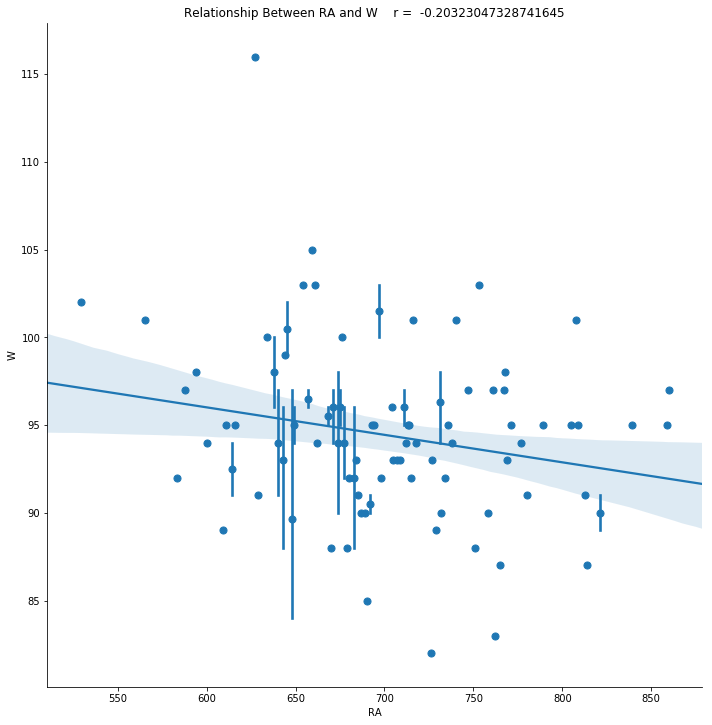

In [56]:
#plotting the relationship using a lmplot to see if relationship is linear or not - RA & W

sns.lmplot(height=10, data=m[['RA', 'W']], x='RA', y='W', x_estimator=np.mean )
plt.title('Relationship Between RA and W' +  '    r =  ' + str(pearsons_r(m['RA'], m['W'])))
# Set x-axis label
plt.xlabel('RA')
# Set y-axis label
plt.ylabel('W')

Text(3.549999999999997, 0.5, 'W')

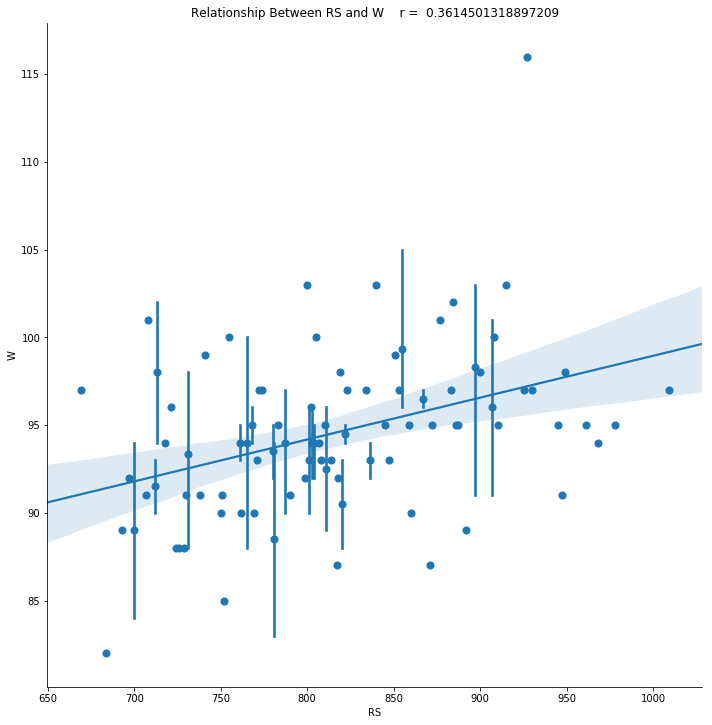

In [57]:
#plotting the relationship using a lmplot to see if relationship is linear or not - RS & W

sns.lmplot(height=10, data=m[['RS', 'W']], x='RS', y='W', x_estimator=np.mean )
plt.title('Relationship Between RS and W' +  '    r =  ' + str(pearsons_r(m['RS'], m['W'])))
# Set x-axis label
plt.xlabel('RS')
# Set y-axis label
plt.ylabel('W')

Text(3.674999999999997, 0.5, 'W')

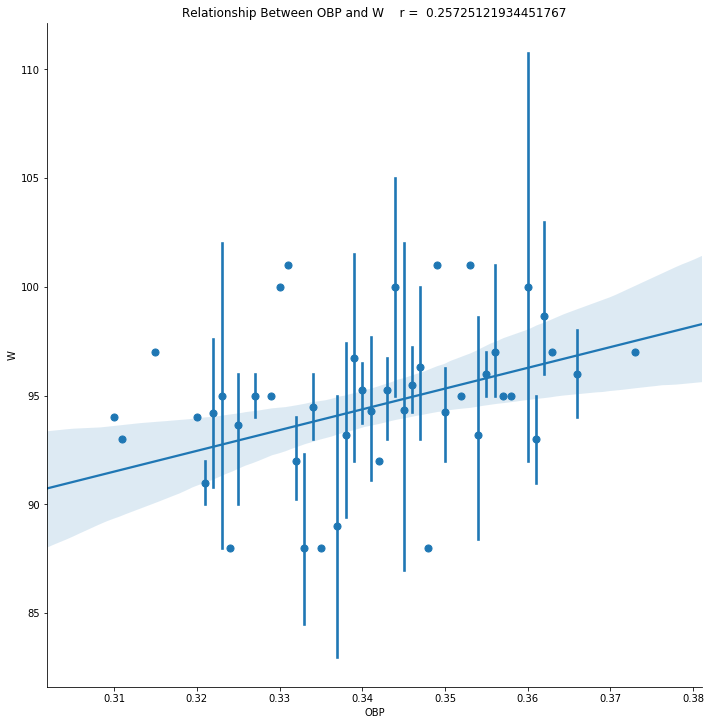

In [58]:
#plotting the relationship using a lmplot to see if relationship is linear or not - OBP & W

sns.lmplot(height=10, data=m[['OBP', 'W']], x='OBP', y='W', x_estimator=np.mean )
plt.title('Relationship Between OBP and W' +  '    r =  ' + str(pearsons_r(m['OBP'], m['W'])))
# Set x-axis label
plt.xlabel('OBP')
# Set y-axis label
plt.ylabel('W')

In [59]:
# Extracting our variables from the dataframe.
x = m[['RS','OBP']].values
y = m[['W']].values

# Calling our model object.
W_model = LinearRegression()
# Fitting the model.
W_model.fit(x,y)
# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

[99.10202523]
[[ 4.17618445e-02 -1.13034894e+02]]


There is a negative coeffiecient associated with OBP. Lets try these models separately. 

In [60]:
# Extracting our variables from the dataframe.
x = m[['RS']].values
y = m[['W']].values

# Calling our model object.
W_model = LinearRegression()
# Fitting the model.
W_model.fit(x,y)
# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

[75.07842215]
[[0.02387158]]


W = 75.08 + 0.024 X (RS)


In [61]:
#predicting
predict_w_rs = ([[m['RS'][2]]])
prediction_w_rs = W_model.predict(predict_w_rs)
w_rs = prediction_w_rs

In [62]:
# Extracting our variables from the dataframe.
x = m[['OBP']].values
y = m[['W']].values

# Calling our model object.
W_model = LinearRegression()
# Fitting the model.
W_model.fit(x,y)
# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

[61.93007309]
[[95.40999273]]


W = 61.93 + 95.41 X (OBP)

In [63]:
#predicting
predict_w_obp = ([[ m['OBP'][2]]])
prediction_w_obp = W_model.predict(predict_w_obp)
w_obp = prediction_w_obp

In [64]:
actual_w = m['W'][2]


In [65]:
t_n = m['Team'][0]
w_model_outputs = {'Model':['Team','RS Model', 'OBP Model' ,'Actual'],'Wins Prediction':[t_n, w_rs, w_obp, actual_w]}
w_model_outputs_df = pd.DataFrame(w_model_outputs)


In [66]:
w_model_outputs_df

,Model,Wins Prediction
0,Team,ATL
1,RS Model,[[91.04850855135685]]
2,OBP Model,[[91.98422080433878]]
3,Actual,97


In [67]:
#What variables are associated with wins?
def standardize(data):
    return (data - data.mean()) / data.std(ddof=0)
def pearsons_r(x, y):
    return (standardize(x) * standardize(y)).mean()
# It doesn't make sense to calculate the correlation between these values and home runs
leave_out = ['index', 'Year', 'Team', 'League', 'Playoffs', 'RankSeason', 'RankPlayoffs', 'Pythagorean Expectation', 'Over or UnderPerformance', 'Games Expected to Win', 'Games Won - Games Expected to Win']
# Meaning of the column names in the data
dictionary = {'index': 'IDX', 'Team':'Team Name','Year':'Year', 'League':'League Name', 
              'RS':'Runs Scored', 'RA': 'Runs Allowed', 'W':'Games Won', 'OBP': 'On Base Percentage', 
              'SLG': 'Slugging Percentage', 'BA': 'Batting Average', 'Playoffs': 'Playoff Rank', 
              'RankSeason': 'Season Rank', 'RankPlayoffs': 'Playoffs Rank', 'G':'Games Played',
              'OOBP': 'Opponnets On Base Percentage', 'OSLG': 'Opponnets Slugging Percentage',
              'Runs Difference': 'RS - RA', 'Pythagorean Expectation':'Pythagorean Expectation', 
              'Winning Percentage':'Winning Avg', 'Over or UnderPerformance':'Over or Under ', 
              'Games Expected to Win':'Games Expected', 
              'Games Won - Games Expected to Win':'Difference'}


positive_correlation = []
negative_correlation = []
strong_positive_correlation = []
strong_negative_correlation = []
def correlations_for_hr(nyy_brs_df):
    columns = list(nyy_brs_df)
    for x in columns:
        if x not in leave_out:
            name_of_metric = dictionary[x]
            r = pearsons_r(m['Winning Percentage'], m[x])
            
            # Calculating the strenth of the correlation
            correlation = ''
            if r > 0.7:
                correlation = '++'
                strong_positive_correlation.append(name_of_metric)
            elif r > 0.5:
                correlation = '+ '
                positive_correlation.append(name_of_metric)
            elif r > 0.3:
                correlation = '+-'
                positive_correlation.append(name_of_metric)
            elif r >= -0.3:
                correlation = 'O '
            elif r > -0.5:
                correlation = '-+'
            elif r > -0.7:
                correlation = '- '
                negative_correlation.append(name_of_metric)
            elif r > -1:
                correlation = '--'
                strong_negative_correlation.append(name_of_metric)
                
            print('{} Correlation between Winning Percentage and {}:{}'.format(correlation, name_of_metric, "%.3f"%r))
            print('-----------------------------------------')
            
print('Correlations:')
print('-----------------------------------------------------')
print(correlations_for_hr(m))
print('Positive correlations: {}'.format(positive_correlation))
print('\n')
print('Strong Positive correlations: {}'.format(strong_positive_correlation))
print('\n')
print('Negative correlations: {}'.format(negative_correlation))
print('\n')
print('Strong Negative correlations: {}'.format(strong_negative_correlation))

Correlations:
-----------------------------------------------------
+- Correlation between Winning Percentage and Runs Scored:0.360
-----------------------------------------
O  Correlation between Winning Percentage and Runs Allowed:-0.203
-----------------------------------------
++ Correlation between Winning Percentage and Games Won:0.999
-----------------------------------------
O  Correlation between Winning Percentage and On Base Percentage:0.256
-----------------------------------------
O  Correlation between Winning Percentage and Slugging Percentage:0.289
-----------------------------------------
O  Correlation between Winning Percentage and Batting Average:0.209
-----------------------------------------
O  Correlation between Winning Percentage and Games Played:-0.115
-----------------------------------------
O  Correlation between Winning Percentage and Opponnets On Base Percentage:-0.274
-----------------------------------------
O  Correlation between Winning Percentage and

The variables that are positively correlated: RS and SLG on Winning Percentage

I plotted the relationship using a lmplot to see if relationship to see this relationship visually :)

RS - Runs Scored SLG - Slugging Percentagentage

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.42499999999999716, 0.5, 'Winning Percentage')

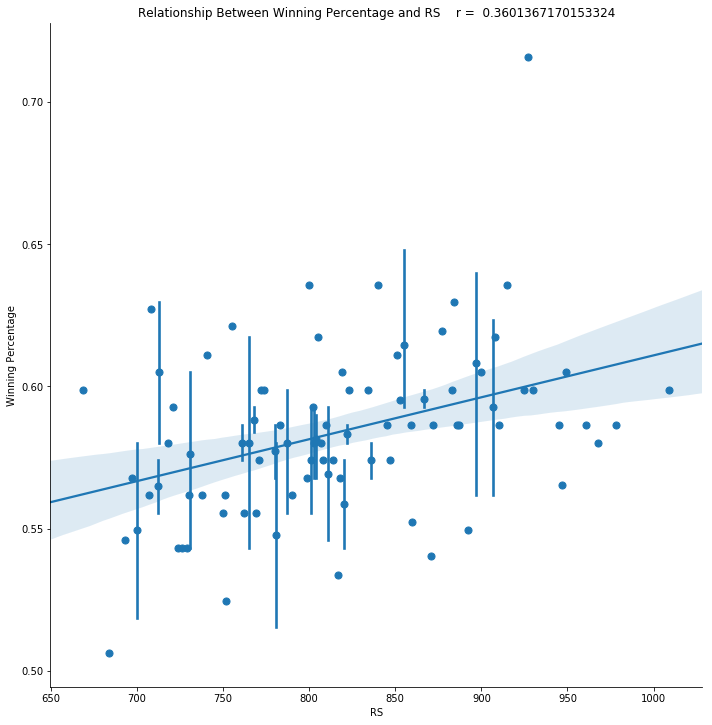

In [68]:
#plotting the relationship using a lmplot to see if relationship is linear or not - WP & RS


sns.lmplot(height=10, data=m[['Winning Percentage', 'RS']], x='RS', y='Winning Percentage', x_estimator=np.mean )
plt.title('Relationship Between Winning Percentage and RS' +  '    r =  ' + str(pearsons_r(m['RS'], m['Winning Percentage'])))
# Set x-axis label
plt.xlabel('RS')
# Set y-axis label
plt.ylabel('Winning Percentage')

#plotting the relationship using a lmplot to see if relationship is linear or not - WP & SLG



Text(0.42499999999999716, 0.5, 'Winning Percentage')

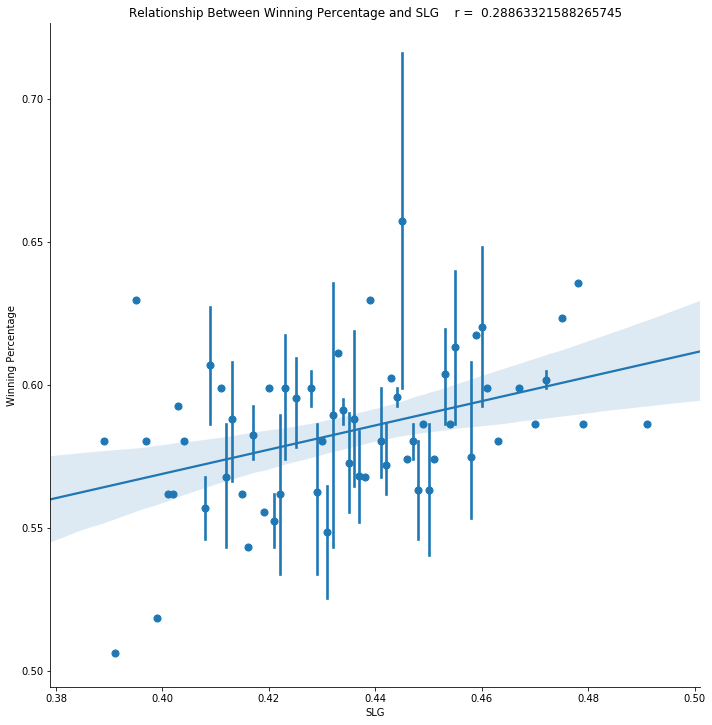

In [69]:

sns.lmplot(height=10, data=m[['Winning Percentage', 'SLG']], x='SLG', y='Winning Percentage', x_estimator=np.mean )
plt.title('Relationship Between Winning Percentage and SLG' +  '    r =  ' + str(pearsons_r(m['SLG'], m['Winning Percentage'])))
# Set x-axis label
plt.xlabel('SLG')
# Set y-axis label
plt.ylabel('Winning Percentage')

In [70]:
# Extracting our variables from the dataframe.
x = m[['RS', 'SLG']].values
y = m[['Winning Percentage']].values

# Calling our model object.
WP_model = LinearRegression()
# Fitting the model.
WP_model.fit(x,y)
# Printing model intercept and coefficients.
print(WP_model.intercept_)
print(WP_model.coef_)

[0.5067174]
[[ 0.00019271 -0.18439033]]


There is a negative coefficient associated with SLG. Lets remove and rerun the model.

In [71]:
# Extracting our variables from the dataframe.
x = m[['RS']].values
y = m[['Winning Percentage']].values

# Calling our model object.
WP_model = LinearRegression()
# Fitting the model.
WP_model.fit(x,y)
# Printing model intercept and coefficients.
print(WP_model.intercept_)
print(WP_model.coef_)

[0.4634565]
[[0.00014747]]


WP = 0.4634565 + 0.00014747 X (RS)

In [72]:
#predicting
predict_wp_rs = ([[ m['RS'][2]]])
prediction_wp_rs = WP_model.predict(predict_wp_rs)
wp_rs = prediction_wp_rs

In [73]:
actual_wp = m['Winning Percentage'][2]


In [74]:
team_n = m['Team'][2]
wp_model_outputs = {'Model':['Team', 'RS Model' ,'Actual'],'Winning Percentage Prediction':[team_n, wp_rs, actual_wp]}
wp_model_outputs_df = pd.DataFrame(wp_model_outputs)


In [75]:
wp_model_outputs_df

,Model,Winning Percentage Prediction
0,Team,CIN
1,RS Model,[[0.5621138684928425]]
2,Actual,0.598765


Recommendation 1: Recruitment 

    There is a positive linear relationship between RS and team wins (r = 0.36).

    There is a positive linear relationship between OBP (r = 0.88)  and SLG (r = 0.71)  with RS.

    Teams should focus their recruiting strategy on undervalued players with high OBP and SLG.


Recommendation 2: Defense

    There is a negative linear relationship between RA and team wins (r = -0.21).

    There is a positive linear relationship OOBP (r = 0.82) and OSLG (r = 0.86) with RA.

    Teams should focus their defensive strategy on undervalued players in opposing teams with with high OOBP and OSLG.|



In [ ]:
'''

https://www.stat.colostate.edu//~vollmer/stat307pdfs/MoneyBall.pdf
https://towardsdatascience.com/linear-regression-moneyball-part-1-b93b3b9f5b53
http://www.mathgoespop.com/2011/09/moneyball.html


https://thesportjournal.org/article/an-examination-of-the-moneyball-theory-a-baseball-statistical-analysis/


http://rstudio-pubs-static.s3.amazonaws.com/326635_edfcfb859221409eb4fcc8e8d564bb09.html

http://www.espn.com/mlb/stats/team/_/stat/batting/year/2016/type/expanded

https://www.baseball-reference.com/teams/

https://www.baseball-reference.com/leagues/MLB/bat.shtml


'''